## k-NN Algorithm

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

## Calculate Euclidean Distance

Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)

In [32]:
# Example of calculating Euclidean distance
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,0],
	[5.332441248,2.088626775,0],
	[6.922596716,1.77106367,0],
	[8.675418651,-0.242068655,0],
	[7.673756466,3.508563011,0]]
row0 = dataset[0]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


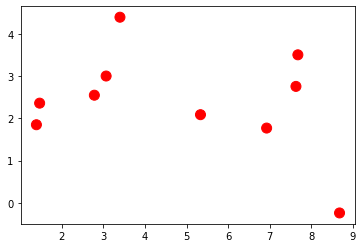

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

d=np.array(dataset)

colormap = np.array(['r', 'g'])
categories = d[:,2].astype(int)

#scatter plot x - column 0, y - column 1, shown with marker o
ax.scatter(d[:,0], d[:,1], marker='o',  s=100,  c=colormap[categories])
plt.show()


In [34]:
# Example of getting neighbors for an instance
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

# Test distance function
dataset = [[2.7810836,2.550537003,1],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,0],
	[5.332441248,2.088626775,0],
	[6.922596716,1.77106367,0],
	[8.675418651,-0.242068655,0],
	[7.673756466,3.508563011,0]]
neighbors = get_neighbors(dataset, dataset[0], 4)
for neighbor in neighbors:
    neighbor[2]=1
# 	print(neighbor)
print(neighbors)

[[2.7810836, 2.550537003, 1], [3.06407232, 3.005305973, 1], [1.465489372, 2.362125076, 1], [1.38807019, 1.850220317, 1]]


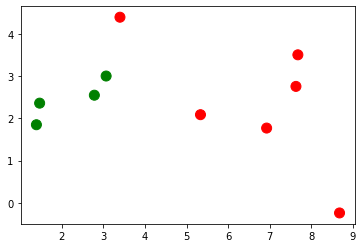

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

d=np.array(dataset)

colormap = np.array(['r', 'g'])
categories = d[:,2].astype(int)

#scatter plot x - column 0, y - column 1, shown with marker o
ax.scatter(d[:,0], d[:,1], marker='o',  s=100,  c=colormap[categories])
plt.show()


### Soctial Networks Ad: 

- A Social_Network_Ads categorical dataset to determine whether a user purchased a particular product

In [36]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Importing the dataset
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [37]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [38]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# In order to resolve this magnitude problem, 
# we have to scale the attributes. For this we used the StandardScaler from sklearn.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
classifier_model = KNeighborsClassifier(n_neighbors = 3)
model_fit=classifier_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [39]:
accuracy_score(y_test, y_pred)

0.93

In [40]:
for k in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_preds = classifier.predict(X_test)
    print("Accuracy for k =", k, "is:", accuracy_score(y_test, y_preds)) 


Accuracy for k = 1 is: 0.87
Accuracy for k = 2 is: 0.9
Accuracy for k = 3 is: 0.93
Accuracy for k = 4 is: 0.92
Accuracy for k = 5 is: 0.93
Accuracy for k = 6 is: 0.93
Accuracy for k = 7 is: 0.93
Accuracy for k = 8 is: 0.93
Accuracy for k = 9 is: 0.93
Accuracy for k = 10 is: 0.93
Accuracy for k = 11 is: 0.93
Accuracy for k = 12 is: 0.93
Accuracy for k = 13 is: 0.93
Accuracy for k = 14 is: 0.93
Accuracy for k = 15 is: 0.93
Accuracy for k = 16 is: 0.93
Accuracy for k = 17 is: 0.93
Accuracy for k = 18 is: 0.93
Accuracy for k = 19 is: 0.93
Accuracy for k = 20 is: 0.93
Accuracy for k = 21 is: 0.93
Accuracy for k = 22 is: 0.93
Accuracy for k = 23 is: 0.93
Accuracy for k = 24 is: 0.93
Accuracy for k = 25 is: 0.93
Accuracy for k = 26 is: 0.93
Accuracy for k = 27 is: 0.93
Accuracy for k = 28 is: 0.93
Accuracy for k = 29 is: 0.93


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


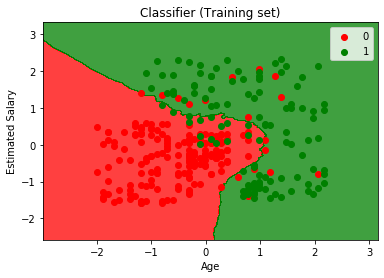

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [43]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
new_X = pd.DataFrame({'Age':56,'EstimatedSalary':7000}, index=[0])
classifier.predict(new_X)


array([1])

In [9]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# kNN for IRIS dataset

In [10]:
# load necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# load Iris dataset
iris = datasets.load_iris()

# get X (features) and y (target) from whole dataset
X = iris.data
y = iris.target

# split them in train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# standardize features by removing the mean and scaling to unit variance
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Apply knn algorithm with multiple values of k on Iris dataset and find the best k
for k in range(2,30):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_preds = classifier.predict(X_test)
    print ("Accuracy for k =", k, "is:", accuracy_score(y_test, y_preds) )   

Accuracy for k = 2 is: 0.9333333333333333
Accuracy for k = 3 is: 0.9333333333333333
Accuracy for k = 4 is: 0.9333333333333333
Accuracy for k = 5 is: 0.9555555555555556
Accuracy for k = 6 is: 0.9777777777777777
Accuracy for k = 7 is: 0.9555555555555556
Accuracy for k = 8 is: 0.9555555555555556
Accuracy for k = 9 is: 0.9555555555555556
Accuracy for k = 10 is: 0.9777777777777777
Accuracy for k = 11 is: 0.9777777777777777
Accuracy for k = 12 is: 0.9777777777777777
Accuracy for k = 13 is: 0.9333333333333333
Accuracy for k = 14 is: 0.9555555555555556
Accuracy for k = 15 is: 0.9555555555555556
Accuracy for k = 16 is: 0.9333333333333333
Accuracy for k = 17 is: 0.9333333333333333
Accuracy for k = 18 is: 0.9333333333333333
Accuracy for k = 19 is: 0.9333333333333333
Accuracy for k = 20 is: 0.9555555555555556
Accuracy for k = 21 is: 0.9555555555555556
Accuracy for k = 22 is: 0.9555555555555556
Accuracy for k = 23 is: 0.9111111111111111
Accuracy for k = 24 is: 0.9333333333333333
Accuracy for k = 25